# Import statements

In [ ]:
# Load the datasets with their corresponding labels
from google.colab import drive
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset 1: Wiki1M abstracts

In [ ]:
embedding_Wiki1M = '/content/drive/MyDrive/output/Wiki1M/embeddings.npy'  # update this
embeddings_Wiki1M = np.load(embedding_Wiki1M)

embedding_keys_1 = '/content/drive/MyDrive/output/Wiki1M/keys.npy'  # update this
keys_Wiki1M = np.load(embedding_keys_1)

In [ ]:
print(embeddings_Wiki1M.shape)

(390, 2048)


Explained variance ratio: [0.10221428 0.08603925]


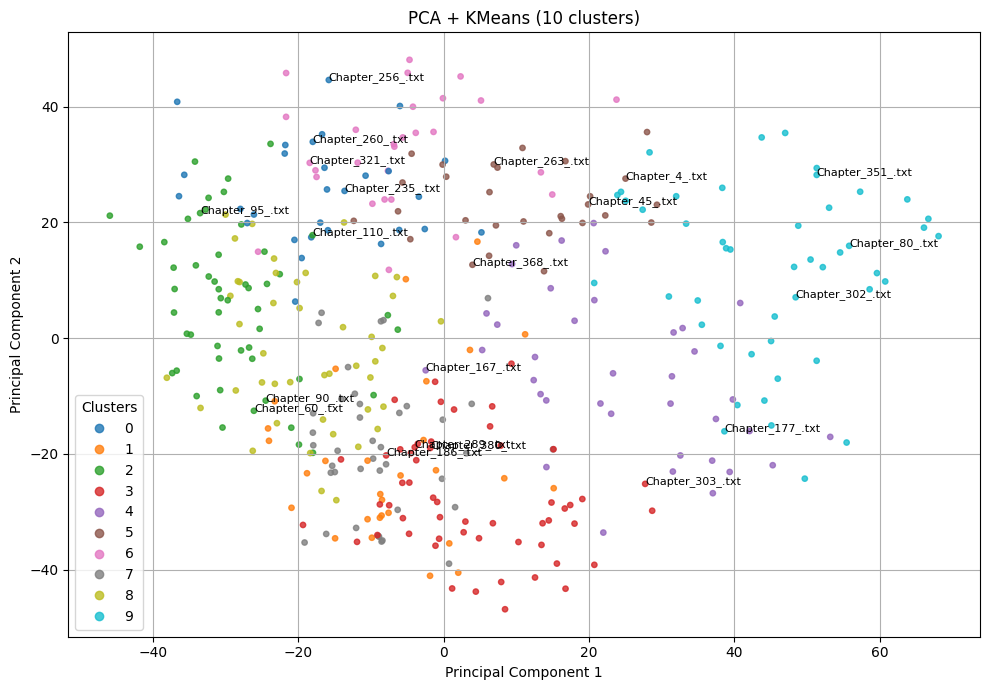

In [ ]:
# --- Step 1: PCA to 2D ---
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_Wiki1M)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# --- Step 2: KMeans clustering ---
n_clusters = 10  # you can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_Wiki1M)

# --- Step 3: Plotting ---
plt.figure(figsize=(10, 7))

# Scatter plot with cluster coloring
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1],
    c=cluster_labels, cmap='tab10',  # color by cluster
    s=15, alpha=0.8
)

# Optional: annotate a few points
for i in range(0, len(keys_Wiki1M), len(keys_Wiki1M)//20):
    plt.annotate(str(keys_Wiki1M[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'PCA + KMeans ({n_clusters} clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


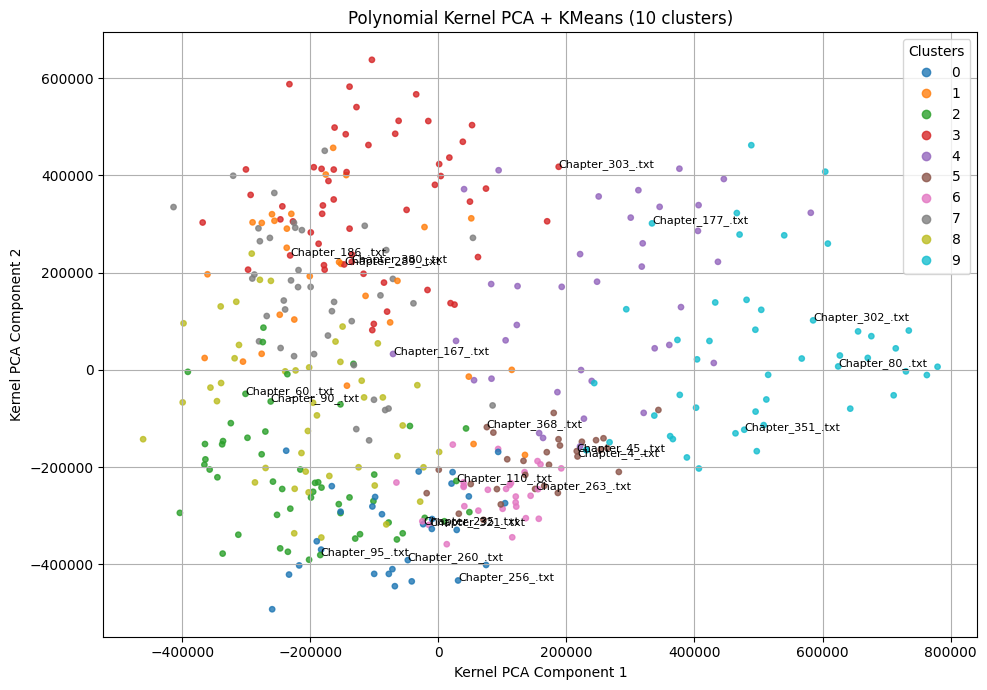

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Step 1: Kernel PCA to 2D with Polynomial Kernel ---
kpca = KernelPCA(n_components=2, kernel='poly', degree=3, coef0=1, gamma=1)
embeddings_2d = kpca.fit_transform(embeddings_Wiki1M)

# --- Step 2: KMeans clustering ---
n_clusters = 10  # you can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_Wiki1M)

# --- Step 3: Plotting ---
plt.figure(figsize=(10, 7))

# Scatter plot with cluster coloring
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1],
    c=cluster_labels, cmap='tab10',  # color by cluster
    s=15, alpha=0.8
)

# Optional: annotate a few points
for i in range(0, len(keys_Wiki1M), len(keys_Wiki1M)//20):
    plt.annotate(str(keys_Wiki1M[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'Polynomial Kernel PCA + KMeans ({n_clusters} clusters)')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()



#Dataset 2: arXiv abstracts

In [ ]:
embedding_arxivAbstract = '/content/drive/MyDrive/output/arXivAbstracts/embeddings.npy'  # update this
embeddings_arxivAbstract = np.load(embedding_arxivAbstract)

embedding_keys_2 = '/content/drive/MyDrive/output/arXivAbstracts/keys.npy'  # update this
keys_arxivAbstract= np.load(embedding_keys_2)

Explained variance ratio: [0.07297388 0.05307877]


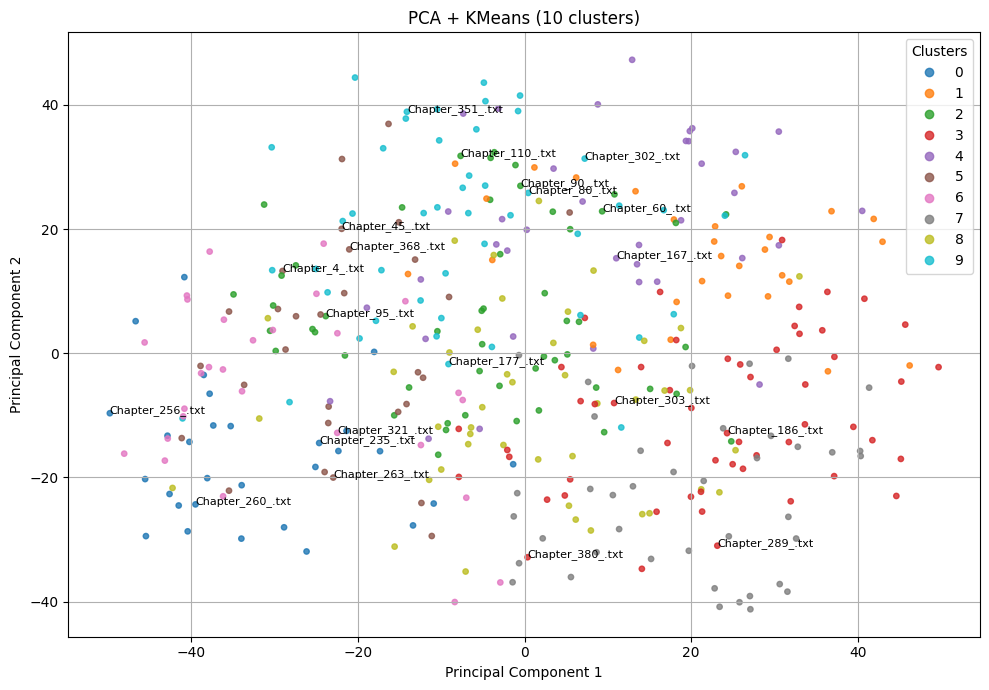

In [ ]:
# --- Step 1: PCA to 2D ---
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_arxivAbstract)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# --- Step 2: KMeans clustering ---
n_clusters = 10  # you can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_Wiki1M)

# --- Step 3: Plotting ---
plt.figure(figsize=(10, 7))

# Scatter plot with cluster coloring
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1],
    c=cluster_labels, cmap='tab10',  # color by cluster
    s=15, alpha=0.8
)

# Optional: annotate a few points
for i in range(0, len(keys_arxivAbstract), len(keys_arxivAbstract)//20):
    plt.annotate(str(keys_arxivAbstract[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'PCA + KMeans ({n_clusters} clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

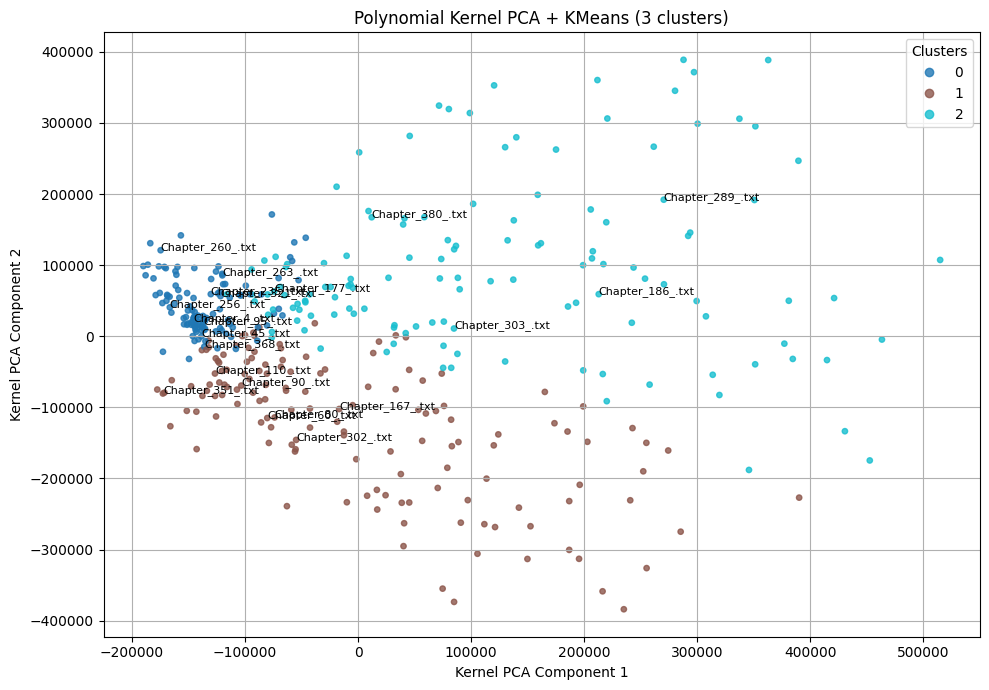

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Step 1: Kernel PCA to 2D with Polynomial Kernel ---
kpca = KernelPCA(n_components=2, kernel='poly', degree=3, coef0=1, gamma=1)
embeddings_2d = kpca.fit_transform(embeddings_arxivAbstract)

# --- Step 2: KMeans clustering (on original high-dimensional embeddings) ---
n_clusters = 3  # you can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_arxivAbstract)

# --- Step 3: Plotting ---
plt.figure(figsize=(10, 7))

# Scatter plot with cluster coloring
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1],
    c=cluster_labels, cmap='tab10',  # color by cluster
    s=15, alpha=0.8
)

# Optional: annotate a few points
for i in range(0, len(keys_arxivAbstract), len(keys_arxivAbstract)//20):
    plt.annotate(str(keys_arxivAbstract[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'Polynomial Kernel PCA + KMeans ({n_clusters} clusters)')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dataset 3: arXiv Titles

In [ ]:
embedding_arxivTitles = '/content/drive/MyDrive/output/arXivTitles/embeddings.npy'  # update this
embeddings_arxivTitles = np.load(embedding_arxivTitles)

embedding_keys_3 = '/content/drive/MyDrive/output/arXivTitles/keys.npy'  # update this
keys_arxivTitles = np.load(embedding_keys_3)

Explained variance ratio: [0.09817468 0.08217407]


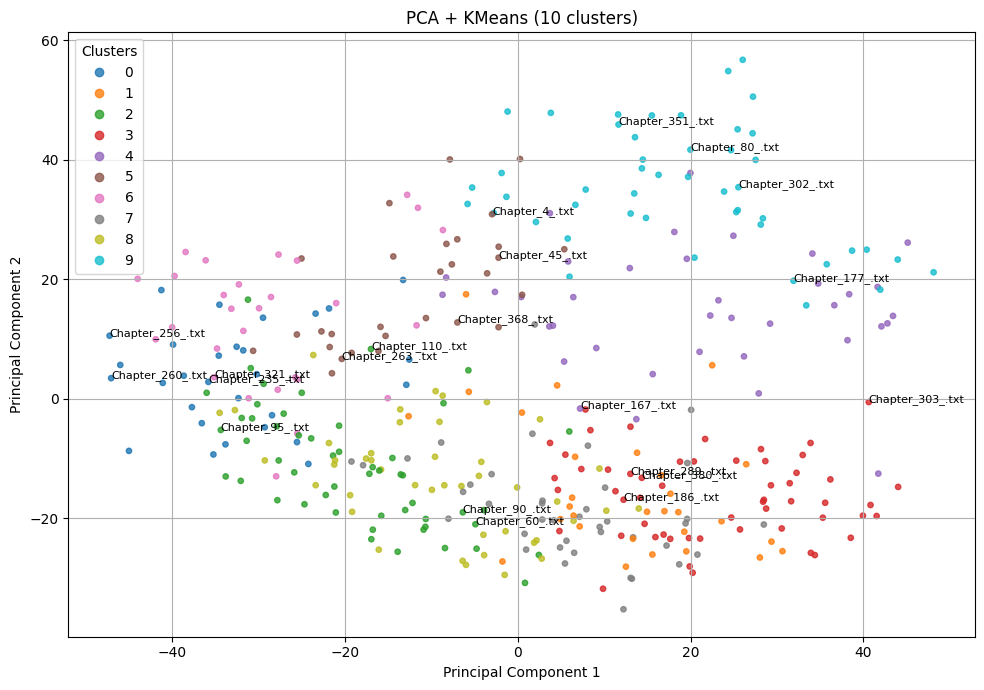

In [ ]:
# --- Step 1: PCA to 2D ---
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_arxivTitles)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# --- Step 2: KMeans clustering ---
n_clusters = 10  # you can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_Wiki1M)

# --- Step 3: Plotting ---
plt.figure(figsize=(10, 7))

# Scatter plot with cluster coloring
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1],
    c=cluster_labels, cmap='tab10',  # color by cluster
    s=15, alpha=0.8
)

# Optional: annotate a few points
for i in range(0, len(keys_arxivTitles), len(keys_arxivTitles)//20):
    plt.annotate(str(keys_arxivTitles[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'PCA + KMeans ({n_clusters} clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()